b'value of m:' 1.00345
b'value of c:' 1.23901
b'Actual values of Y' [  2.99000001   6.78000021  10.01000023   8.5         11.10999966  25.        ]
b'predicted values of Y' [  3.135535     6.91854858  10.15969849   8.26317406  10.83201218
  25.08102798]
Root mean square error: 0.183809


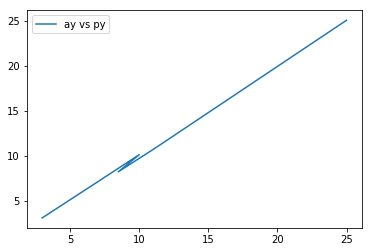

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

X=tf.constant([1.89,5.66,8.89,7.00,9.56,23.76])
Y=tf.constant([2.99,6.78,10.01,8.50,11.11,25.00])

mn=tf.constant("value of m:")
mc=tf.constant("value of c:")
ay=tf.constant("Actual values of Y")
py=tf.constant("predicted values of Y")


mnx = tf.reduce_mean(X)
mny = tf.reduce_mean(Y)


vrx=tf.Variable(X-mnx)
vry=tf.Variable(Y-mny)
l=tf.size(X)
a=l-1
p=tf.cast(a,tf.float32)

V=tf.multiply(vrx,vry)
cm=tf.reduce_sum(V)
CV=tf.div(cm,p)

vs=tf.square(vrx)
sn=tf.reduce_sum(vs)
sm=tf.div(sn,p)


m=tf.divide(CV,sm)
c=mny-(mnx*m)


pr=tf.multiply(X,m)
PRY=tf.add(pr,c)     


rmer=tf.sqrt(tf.reduce_mean(tf.squared_difference(Y,PRY)))
    
initial = tf.global_variables_initializer()
session = tf.Session()
session.run(initial)
 

print(session.run(mn),session.run(m))
print(session.run(mc),session.run(c))

print(session.run(ay),session.run(Y))
print(session.run(py),session.run(PRY))
print("Root mean square error:",session.run(rmer))

plt.plot(session.run(Y),session.run(PRY),label='ay vs py')
plt.legend()
plt.show()
